In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3,3),activation = 'relu',input_shape= (64,64,3)))
model.add(BatchNormalization())

model.add(Conv2D(32,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(16,kernel_size = (3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.summary()

2022-07-28 20:26:48.477265: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-28 20:26:48.477323: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sujan-Inspiron-5559): /proc/driver/nvidia/version does not exist
2022-07-28 20:26:48.512264: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 62, 62, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 16)        4

In [2]:
model.add(Dense(units = 128,activation = 'relu'))
model.add(Dense(units = 64,activation = 'relu'))
model.add(Dense(units = 16,activation = 'relu'))
model.add(Dense(units = 1,activation = 'sigmoid'))

In [3]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics =['acc'])

In [4]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
train_set = train_datagen.flow_from_directory('/home/sujan/AIDatasets/PetImages/training_set/training_set',
                                              target_size = (64,64),
                                              batch_size = 16,
                                              class_mode = 'binary')

Found 8005 images belonging to 2 classes.


In [6]:
test_set = train_datagen.flow_from_directory('/home/sujan/AIDatasets/PetImages/test_set/test_set',
                                              target_size = (64,64),
                                              batch_size = 16,
                                              class_mode = 'binary')

Found 2023 images belonging to 2 classes.


In [7]:
history = model.fit(train_set,
                    steps_per_epoch = 800//16,
                    epochs = 2,
                    validation_data = test_set,
                    validation_steps=200//16,
                    shuffle=True,
                    verbose=1
                    )

model.save('cat_dog.h5')

Epoch 1/2


2022-07-28 20:35:17.601605: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 29804544 exceeds 10% of free system memory.
2022-07-28 20:35:17.610651: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 29804544 exceeds 10% of free system memory.
2022-07-28 20:35:17.657306: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 29030400 exceeds 10% of free system memory.


 2/50 [>.............................] - ETA: 8s - loss: 0.6958 - acc: 0.6562  

2022-07-28 20:35:17.963472: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 14530320 exceeds 10% of free system memory.
2022-07-28 20:35:18.015676: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 29804544 exceeds 10% of free system memory.


50/50 [==============================] - 22s 377ms/step - loss: 0.7226 - acc: 0.5200 - val_loss: 0.6926 - val_acc: 0.4792
Epoch 2/2
50/50 [==============================] - 17s 344ms/step - loss: 0.6682 - acc: 0.5875 - val_loss: 0.6840 - val_acc: 0.5833


In [8]:
history.history

{'loss': [0.7226325869560242, 0.6682425737380981],
 'acc': [0.5199999809265137, 0.5874999761581421],
 'val_loss': [0.692592442035675, 0.6839547157287598],
 'val_acc': [0.4791666567325592, 0.5833333134651184]}

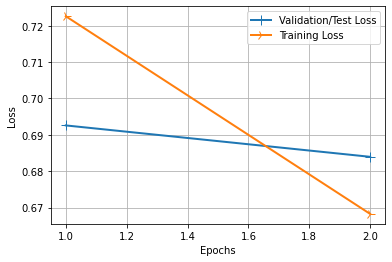

In [9]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

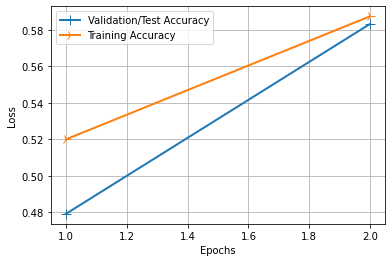

In [10]:
# Plotting our acuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, loss_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [11]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

input_image_path = '/home/sujan/AIDatasets/PetImages/training_set/training_set/cats/cat.111.jpg'

# Show our input Image for Feature visualization
img1 = image.load_img(input_image_path)
plt.imshow(img1);

img_size = (64,64)
# load imamge into a 4D Tensor, convert it to a numpy array and expand to 4 dim
img1 = image.load_img(input_image_path, target_size = img_size)
image_tensor = image.img_to_array(img1)
#print(image_tensor.shape)
image_tensor = image_tensor/255
image_tensor = np.expand_dims(image_tensor, axis=0)
#print(img.shape)

AttributeError: module 'keras.preprocessing.image' has no attribute 'load_img'

In [12]:
from keras import models

# Extracts the top 8 layers
layer_outputs = [layer.output for layer in model.layers[:9]]

# Creates a model that returns these outputs given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [13]:
import matplotlib.pyplot as plt
activations = activation_model.predict(image_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 50], cmap='viridis')

NameError: name 'image_tensor' is not defined

In [14]:
layer_names = []
for layer in model.layers[:9]:
    layer_names.append(layer.name)
images_per_row = 16

# Get CONV layers only
conv_layer_names = []
for layer_name in layer_names:
    if 'conv2d' in layer_name:
        conv_layer_names.append(layer_name)

for layer_name, layer_activation in zip(conv_layer_names, activations):
    n_features = layer_activation.shape[-1]
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
            row * size : (row + 1) * size] = channel_image
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

NameError: name 'activations' is not defined

In [ ]:
import numpy as np
import keras
from keras.preprocessing import image
from keras.models import load_model

classifier = load_model()
test_image = image.load_image('',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
print(result)
if result[0][0] == 1:
    print('dog')
else:
    print('cat')